In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_fst_tests = pd.read_csv("csv/init_tests.csv")
df_snd_tests = pd.read_csv("csv/second_tests.csv")
df_personal_attributes = pd.read_csv("csv/personal_attributes.csv")

df_fst_tests

,Unnamed: 0,student_id,openness,cultural_empathy,openmindness,adaptability,flexibility,emotional_stability,social_initiative
0,0,0,6.418,6.096,4.717,4.857,3.002,3.686,5.749
1,1,1,6.321,6.045,5.392,3.053,3.520,3.968,5.563
2,2,2,6.331,5.826,5.488,3.992,4.043,3.681,5.599
3,3,3,5.437,6.134,5.909,3.292,3.359,4.235,6.085
4,4,4,5.467,5.592,4.450,3.597,3.259,4.941,5.155
...,...,...,...,...,...,...,...,...,...
995,995,995,6.632,4.918,5.017,3.638,2.918,3.988,5.125
996,996,996,6.111,6.229,6.213,3.525,3.604,4.046,4.719
997,997,997,6.192,5.701,4.954,2.948,3.203,4.594,4.910
998,998,998,5.262,6.334,5.395,3.733,2.793,3.916,4.928


In [3]:
df_snd_tests

,Unnamed: 0,openness,cultural_empathy,openmindness,adaptability,flexibility,emotional_stability,social_initiative,action,student_id
0,0,7.000000,7.000000,4.902089,5.757614,3.086249,4.005938,6.145552,Language courses,0.0
1,1,7.000000,7.000000,7.000000,4.260301,5.060325,5.494086,7.000000,IVC,1.0
2,2,6.609143,5.880776,6.121535,4.018682,4.446556,4.073395,6.189039,International Classroom,2.0
3,3,6.471474,7.000000,7.000000,3.839304,4.035758,4.900682,7.000000,IVC,3.0
4,4,7.000000,7.000000,6.059668,4.698154,4.385241,6.403421,6.658032,IVC,4.0
...,...,...,...,...,...,...,...,...,...,...
995,995,6.989469,5.011636,5.649594,3.697283,3.239904,4.455256,5.719177,International Classroom,995.0
996,996,6.146080,6.057530,6.676682,3.418734,3.818720,4.313498,5.025461,International Classroom,996.0
997,997,6.561906,6.085448,5.262222,3.084935,3.208578,4.267968,4.498802,Blogging,997.0
998,998,6.028425,7.000000,6.604164,4.124120,3.371096,4.755690,5.978107,International Classroom,998.0


In [4]:
df_personal_attributes

,Unnamed: 0,student_id,gender,age,prior_education,course_of_studies,year_of_study,nationality,parent_occupation,previous_international_experience,languages
0,0,0,Female,18,VMBO,International business,3,Japanese,Life coach,I went to Germany once,"['English', 'Japanese']"
1,1,1,Female,23,VWO,International business,1,Dutch,Life coach,I went to Germany once,"['Dutch', 'English', 'German']"
2,2,2,Female,21,VWO,International business,0,Korean,Life coach,I basically have none,"['English', 'Korean']"
3,3,3,Male,19,Gymnasium,International business,0,Dutch,Politician,I have backpacked through Australia for half a...,"['Dutch', 'English', 'German']"
4,4,4,Female,23,VWO,International business,2,German,Politician,I went to Germany once,"['English', 'German']"
...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,Male,21,VMBO,International business,0,Spain,Gardener,I went to Germany once,"['English', 'Spanish']"
996,996,996,Female,18,VWO,International business,1,Dutch,Taxi driver,I have backpacked through Australia for half a...,"['Dutch', 'English']"
997,997,997,Male,24,VWO,International business,2,Korean,Gardener,My father has been relocated to a lot of diffe...,"['English', 'Korean']"
998,998,998,Male,19,HAVO,International business,3,Spain,Marine,I went to Germany once,"['English', 'Spanish']"


In [65]:
attribute_cols = df_personal_attributes.columns[2:].values
attribute_cols

array(['gender', 'age', 'prior_education', 'course_of_studies',
       'year_of_study', 'nationality', 'parent_occupation',
       'previous_international_experience', 'languages'], dtype=object)

In [5]:
skill_cols = df_fst_tests.columns[2:]
skill_cols

Index(['openness', 'cultural_empathy', 'openmindness', 'adaptability',
       'flexibility', 'emotional_stability', 'social_initiative'],
      dtype='object')

In [78]:
cols = skill_cols.insert(0, 'action')
cols = cols.insert(0, 'student_id')
df_skill_diffs = pd.DataFrame(columns=cols)
df_skill_diffs

,student_id,action,openness,cultural_empathy,openmindness,adaptability,flexibility,emotional_stability,social_initiative


In [79]:
for student_id in df_fst_tests['student_id'].values:
    student_row = {
                    'student_id':student_id
                  }
    
    df_student_attributes = df_personal_attributes.loc[df_personal_attributes['student_id'] == student_id]
    for attribute in attribute_cols:
        student_row[attribute] = df_student_attributes[attribute].values[0]
        
    for skill in skill_cols:
        
        
        skl_lvl_fst = df_fst_tests.loc[df_fst_tests['student_id'] == student_id][skill]
        
        snd = df_snd_tests.loc[df_snd_tests['student_id'] == student_id]
        skl_lvl_snd = snd[skill]
        action = snd['action'].values[0]
        skl_diff = (skl_lvl_snd.values - skl_lvl_fst.values)[0]
#         print(student_id, skill, skl_lvl_fst.values, skl_lvl_snd.values, skl_diff)
        
        student_row['action'] = action
        student_row[skill] = skl_diff
    df_skill_diffs = df_skill_diffs.append(student_row, ignore_index=True)
        
df_skill_diffs

,student_id,action,openness,cultural_empathy,openmindness,adaptability,flexibility,emotional_stability,social_initiative,age,course_of_studies,gender,languages,nationality,parent_occupation,previous_international_experience,prior_education,year_of_study
0,0,Language courses,0.582000,0.904000,0.185089,0.900614,0.084249,0.319938,0.396552,18.0,International business,Female,"['English', 'Japanese']",Japanese,Life coach,I went to Germany once,VMBO,3.0
1,1,IVC,0.679000,0.955000,1.608000,1.207301,1.540325,1.526086,1.437000,23.0,International business,Female,"['Dutch', 'English', 'German']",Dutch,Life coach,I went to Germany once,VWO,1.0
2,2,International Classroom,0.278143,0.054776,0.633535,0.026682,0.403556,0.392395,0.590039,21.0,International business,Female,"['English', 'Korean']",Korean,Life coach,I basically have none,VWO,0.0
3,3,IVC,1.034474,0.866000,1.091000,0.547304,0.676758,0.665682,0.915000,19.0,International business,Male,"['Dutch', 'English', 'German']",Dutch,Politician,I have backpacked through Australia for half a...,Gymnasium,0.0
4,4,IVC,1.533000,1.408000,1.609668,1.101154,1.126241,1.462421,1.503032,23.0,International business,Female,"['English', 'German']",German,Politician,I went to Germany once,VWO,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,International Classroom,0.357469,0.093636,0.632594,0.059283,0.321904,0.467256,0.594177,21.0,International business,Male,"['English', 'Spanish']",Spain,Gardener,I went to Germany once,VMBO,0.0
996,996,International Classroom,0.035080,-0.171470,0.463682,-0.106266,0.214720,0.267498,0.306461,18.0,International business,Female,"['Dutch', 'English']",Dutch,Taxi driver,I have backpacked through Australia for half a...,VWO,1.0
997,997,Blogging,0.369906,0.384448,0.308222,0.136935,0.005578,-0.326032,-0.411198,24.0,International business,Male,"['English', 'Korean']",Korean,Gardener,My father has been relocated to a lot of diffe...,VWO,2.0
998,998,International Classroom,0.766425,0.666000,1.209164,0.391120,0.578096,0.839690,1.050107,19.0,International business,Male,"['English', 'Spanish']",Spain,Marine,I went to Germany once,HAVO,3.0


<h2>Content-Based Values</h2>

In [100]:
content_based_cols = skill_cols
content_based_cols = content_based_cols.insert(0, 'action')
content_based_cols = content_based_cols.insert(0, 'student_id')
df_skill_diffs[content_based_cols]

,student_id,action,openness,cultural_empathy,openmindness,adaptability,flexibility,emotional_stability,social_initiative
0,0,Language courses,0.582000,0.904000,0.185089,0.900614,0.084249,0.319938,0.396552
1,1,IVC,0.679000,0.955000,1.608000,1.207301,1.540325,1.526086,1.437000
2,2,International Classroom,0.278143,0.054776,0.633535,0.026682,0.403556,0.392395,0.590039
3,3,IVC,1.034474,0.866000,1.091000,0.547304,0.676758,0.665682,0.915000
4,4,IVC,1.533000,1.408000,1.609668,1.101154,1.126241,1.462421,1.503032
...,...,...,...,...,...,...,...,...,...
995,995,International Classroom,0.357469,0.093636,0.632594,0.059283,0.321904,0.467256,0.594177
996,996,International Classroom,0.035080,-0.171470,0.463682,-0.106266,0.214720,0.267498,0.306461
997,997,Blogging,0.369906,0.384448,0.308222,0.136935,0.005578,-0.326032,-0.411198
998,998,International Classroom,0.766425,0.666000,1.209164,0.391120,0.578096,0.839690,1.050107


In [101]:
action_mean_diffs = df_skill_diffs[content_based_cols].groupby(['action']).mean()
action_mean_diffs

,openness,cultural_empathy,openmindness,adaptability,flexibility,emotional_stability,social_initiative
action,,,,,,,
Blogging,0.967810,0.848179,1.011785,0.788084,0.497223,0.304911,0.305786
CCCC,0.562081,0.648987,0.857829,0.094376,-0.017358,0.669594,0.137987
Extra-curricular Courses,-0.157927,-0.132198,0.279751,-0.206790,0.264152,-0.051311,-0.125654
IE,0.599566,0.244714,0.993622,0.159174,0.559941,0.491157,0.351675
IVC,1.095542,1.090133,1.227207,0.828772,0.824963,0.925258,1.044127
International (guest) lecturers,-0.070425,-0.219225,-0.044960,0.431858,0.313060,-0.228511,0.368831
International Classroom,0.464114,0.293151,0.796474,0.182207,0.466755,0.653463,0.767145
Language courses,0.495726,0.575495,-0.063192,0.478749,-0.062748,0.141076,0.087083
PCSA,0.192775,0.027541,0.892252,0.067320,0.131209,0.484468,0.184444


<AxesSubplot:xlabel='action'>

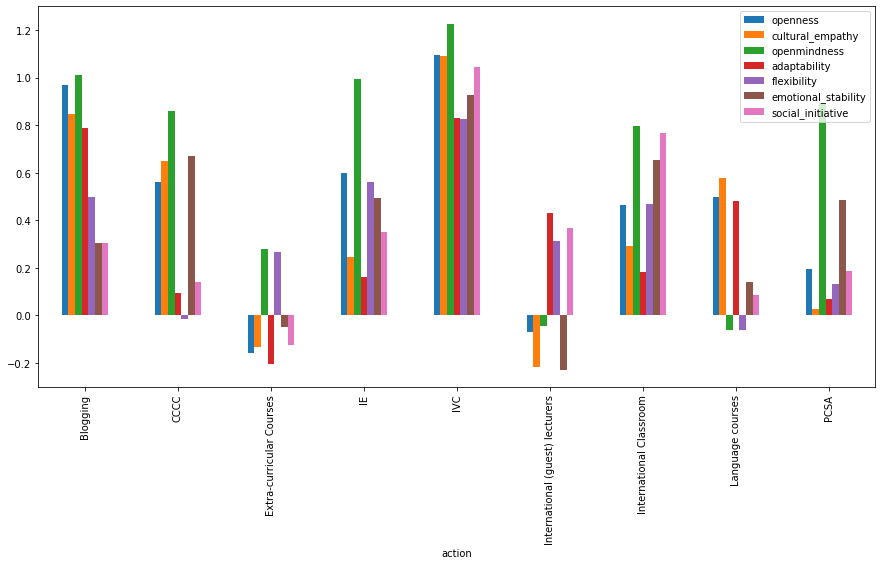

In [102]:
action_mean_diffs.plot.bar(figsize=[15,7])

<h2>Collaborative-Filtering (attribute-based)</h2>

In [104]:
df_skill_diffs.head(3)

,student_id,action,openness,cultural_empathy,openmindness,adaptability,flexibility,emotional_stability,social_initiative,age,course_of_studies,gender,languages,nationality,parent_occupation,previous_international_experience,prior_education,year_of_study
0,0,Language courses,0.582000,0.904000,0.185089,0.900614,0.084249,0.319938,0.396552,18.0,International business,Female,"['English', 'Japanese']",Japanese,Life coach,I went to Germany once,VMBO,3.0
1,1,IVC,0.679000,0.955000,1.608000,1.207301,1.540325,1.526086,1.437000,23.0,International business,Female,"['Dutch', 'English', 'German']",Dutch,Life coach,I went to Germany once,VWO,1.0
2,2,International Classroom,0.278143,0.054776,0.633535,0.026682,0.403556,0.392395,0.590039,21.0,International business,Female,"['English', 'Korean']",Korean,Life coach,I basically have none,VWO,0.0


<AxesSubplot:xlabel='prior_education'>

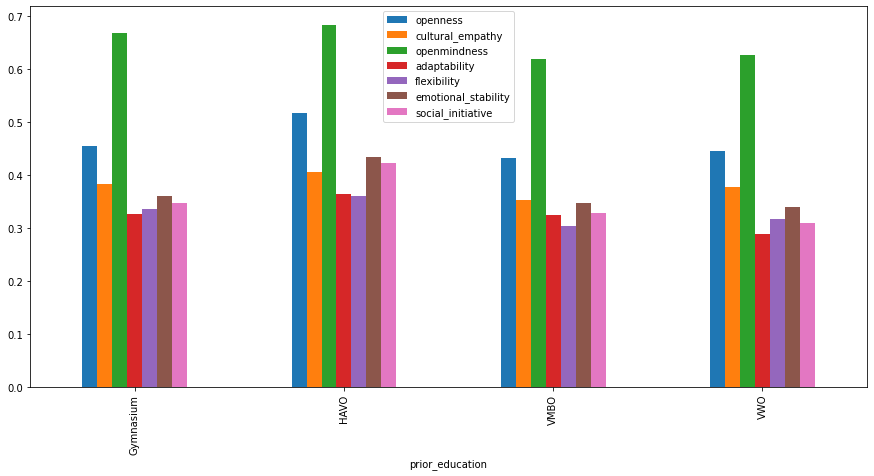

In [116]:
attribute_mean_diffs = df_skill_diffs.groupby(['prior_education']).mean()
attribute_mean_diffs[skill_cols].plot.bar(figsize=[15,7])